# Fuzzy Control Example
## Overiveiw and Terminology

Fuzzy Logic is a methodology predicated on the idea that the “truthiness” of something can be expressed over a continuum. This is to say that something isn’t true or false but instead partially true or partially false.

A fuzzy variable has a crisp value which takes on some number over a pre-defined domain (in fuzzy logic terms, called a universe). The crisp value is how we think of the variable using normal mathematics. For example, if my fuzzy variable was how much to tip someone, it’s universe would be 0 to 25% and it might take on a crisp value of 15%.

A fuzzy variable also has several terms that are used to describe the variable. The terms taken together are the fuzzy set which can be used to describe the “fuzzy value” of a fuzzy variable. These terms are usually adjectives like “poor,” “mediocre,” and “good.” Each term has a membership function that defines how a crisp value maps to the term on a scale of 0 to 1. In essence, it describes “how good” something is.

So, back to the tip example, a “good tip” might have a membership function which has non-zero values between 15% and 25%, with 25% being a “completely good tip” (ie, it’s membership is 1.0) and 15% being a “barely good tip” (ie, its membership is 0.1).

A fuzzy control system links fuzzy variables using a set of rules. These rules are simply mappings that describe how one or more fuzzy variables relates to another. These are expressed in terms of an IF-THEN statement; the IF part is called the antecedent and the THEN part is the consequent. In the tiping example, one rule might be “IF the service was good THEN the tip will be good.” The exact math related to how a rule is used to calcualte the value of the consequent based on the value of the antecedent is outside the scope of this primer.
The Tipping Problem

Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

    Antecednets (Inputs)

            service
               Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
               Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing

            food quality
               Universe: How tasty was the food, on a scale of 1 to 10?
               Fuzzy set: bad, decent, great

    Consequents (Outputs)

            tip
               Universe: How much should we tip, on a scale of 0% to 25%
               Fuzzy set: low, medium, high

    Rules
            IF the service was good or the food quality was good, THEN the tip will be high.
            IF the service was average, THEN the tip will be medium.
            IF the service was poor and the food quality was poor THEN the tip will be low.



## Installation 

Scikit-fuzzy can be instally using pip by using the following shell command.

In [23]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [24]:
# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)


In [18]:
# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

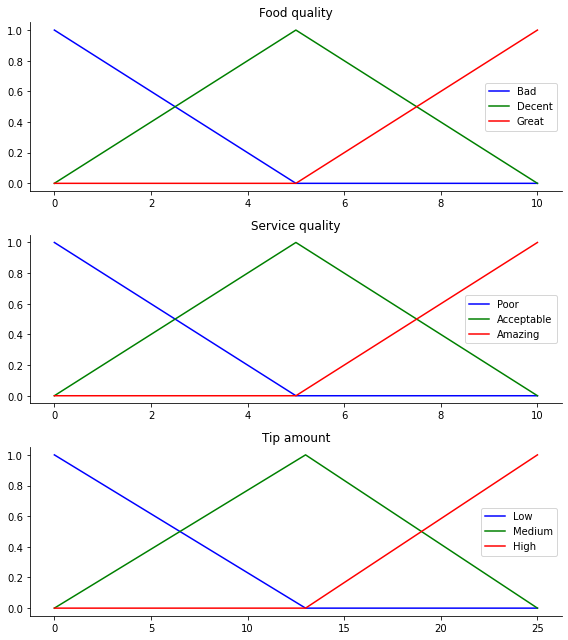

In [19]:

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


## Fuzzy rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

    If the food is bad OR the service is poor, then the tip will be low
    If the service is acceptable, then the tip will be medium
    If the food is great OR the service is amazing, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.
Rule application

What would the tip be in the following circumstance:

    Food quality was 6.5
    Service was 9.8


In [27]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

In [28]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

In [29]:
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

In [30]:
# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(serv_level_md, tip_md)

In [31]:
# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

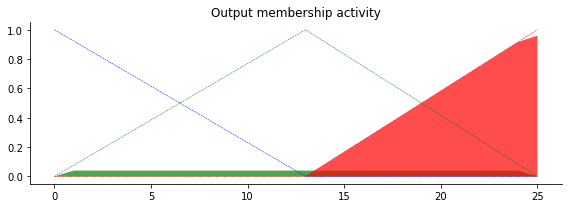

In [20]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Rule aggregation

With the activity of each output membership function known, all output membership functions must be combined. This is typically done using a maximum operator. This step is also known as aggregation.

numpy.fmax() function is used to compute element-wise maximum of array elements. This function compare two arrays and returns a new array containing the element-wise maxima.

In [33]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

## Defuzzification

Finally, to get a real world answer, we return to crisp logic from the world of fuzzy membership functions. For the purposes of this example the centroid method will be used.


In [15]:
# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot




The result is a tip:

In [16]:
print(tip)

19.86871794871795


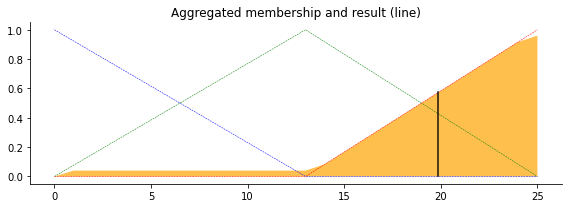

In [17]:

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()